# 주제
    - 영화에 대한 고객들의 평가데이터를 분석, 예측들을 회귀모델을 통해 구현
    - 회귀의 평가 지표를 사용
    - 특성들의 배치와 조합에 따라 지표는 다르게 나올 수 있다 => 데이터를 준비하는 과정에 순서, 사용하는 특성 종류 등도 영향을 미친다 

In [1]:
import numpy as np
import pandas as pd

# 데이터 로드 

## 고객 정보 로드 

In [2]:
users = pd.read_csv('./content/ml-100k/u.user', sep='|')
users.head(2)

1  24  M technician  85711
0  2  53  F      other  94043
1  3  23  M     writer  32067

In [3]:
cols = ['uid','age','s','job','zipcode']
cols 

['uid', 'age', 's', 'job', 'zipcode']

In [4]:
users = pd.read_csv('./content/ml-100k/u.user', sep='|', names=cols)
# names=사용할 컬럼명 리스트(순서대로) 
users.head(2)

uid  age  s         job zipcode
0    1   24  M  technician   85711
1    2   53  F       other   94043

## 영화 정보 로드 

In [5]:
movies = pd.read_csv('./content/ml-100k/u.item', sep='|', encoding='latin1')
movies.head(2)

1   Toy Story (1995)  01-Jan-1995  Unnamed: 3  \
0  2   GoldenEye (1995)  01-Jan-1995         NaN   
1  3  Four Rooms (1995)  01-Jan-1995         NaN   

  http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)  0  0.1  0.2  1.1  \
0  http://us.imdb.com/M/title-exact?GoldenEye%20(...     0    1    1    0   
1  http://us.imdb.com/M/title-exact?Four%20Rooms%...     0    0    0    0   

   1.2  ...  0.6  0.7  0.8  0.9  0.10  0.11  0.12  0.13  0.14  0.15  
0    0  ...    0    0    0    0     0     0     0     1     0     0  
1    0  ...    0    0    0    0     0     0     0     1     0     0  

[2 rows x 24 columns]

In [6]:
cols = ['mid','title','release_date','video_release_date','url']
movies = pd.read_csv('./content/ml-100k/u.item', sep='|', encoding='latin1', names=cols, usecols=range(5))
# usecols : 컬럼을 무엇만 사용할지 
movies.head(2)

mid             title release_date  video_release_date  \
0    1  Toy Story (1995)  01-Jan-1995                 NaN   
1    2  GoldenEye (1995)  01-Jan-1995                 NaN   

                                                 url  
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...  
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...

In [7]:
users.shape, movies.shape

((943, 5), (1682, 5))

## 평점 정보 로드 

In [8]:
ratings = pd.read_csv('./content/ml-100k/u.data', sep='\t')
ratings.head(2)

196  242  3  881250949
0  186  302  3  891717742
1   22  377  1  878887116

In [9]:
cols = ['uid','mid','rating','date']
ratings = pd.read_csv('./content/ml-100k/u.data', sep='\t', names=cols )
ratings.head(2)

uid  mid  rating       date
0  196  242       3  881250949
1  186  302       3  891717742

In [10]:
ratings['date']

0        881250949
1        891717742
2        878887116
3        880606923
4        886397596
           ...    
99995    880175444
99996    879795543
99997    874795795
99998    882399156
99999    879959583
Name: date, Length: 100000, dtype: int64

In [11]:
# 881250949 : 1970.01.01 00:00:00 초부터 현재까지 진행된 시간+9시간,
# 시간형식 = long = yyyyMMdd hhmmss
# 시간 정보가 직관적이지 않다 => 직관적은 시간 정보로 변환 
# date 컬럼의 값을 변경하여 원 구조에 다시 적용 

ratings['date'] = pd.to_datetime(ratings['date'], unit='s')
# to_datetime, unit='%'
ratings.head(2)

uid  mid  rating                date
0  196  242       3 1997-12-04 15:55:49
1  186  302       3 1998-04-04 19:22:22

In [12]:
ratings.shape

(100000, 4)

# 데이터 준비 
- 품질 향상 
- 시각화
- 통찰 (일부 진행 가능)

In [13]:
# DataFrame이 1개 이상으로 존재한다 -> 필연적 -> 병합 과정 
# merge, concat 등 
# movies, ratings 병합 
movies_ratings = pd.merge(movies, ratings) # 중복되는 컬럼은 자동으로 합쳐진다, 총 컬럼 가로로 
movies_ratings.head(2)

mid             title release_date  video_release_date  \
0    1  Toy Story (1995)  01-Jan-1995                 NaN   
1    1  Toy Story (1995)  01-Jan-1995                 NaN   

                                                 url  uid  rating  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...  308       4   
1  http://us.imdb.com/M/title-exact?Toy%20Story%2...  287       5   

                 date  
0 1998-02-17 17:28:52  
1 1997-09-27 04:21:28

In [14]:
movies_ratings.shape

(100000, 8)

In [15]:
# 평점 데이터를 기준으로 병합 완성 
moives_ratings_users = pd.merge( movies_ratings, users )
datas = moives_ratings_users
datas.head(2)

mid              title release_date  video_release_date  \
0    1   Toy Story (1995)  01-Jan-1995                 NaN   
1    4  Get Shorty (1995)  01-Jan-1995                 NaN   

                                                 url  uid  rating  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...  308       4   
1  http://us.imdb.com/M/title-exact?Get%20Shorty%...  308       5   

                 date  age  s      job zipcode  
0 1998-02-17 17:28:52   60  M  retired   95076  
1 1998-02-17 17:51:30   60  M  retired   95076

In [16]:
datas.shape

(100000, 12)

# 데이터 살펴보기 
- 특성, 성향 등의 데이터의 특징을 확인 

In [17]:
# 평가를 가장 많이 받은 작품 상위 10 개 보기 
# 작품별 평가 수를 구해라 -> 내림차순 정렬 -> 상위 10
# value_counts() 값의 빈도를 계산해서, 정렬(기본값), 내림차순(기본값)

rates = datas[['title','rating']]
rates 

title  rating
0                Toy Story (1995)       4
1               Get Shorty (1995)       5
2                  Copycat (1995)       4
3           Twelve Monkeys (1995)       4
4                     Babe (1995)       5
...                           ...     ...
99995           Saint, The (1997)       4
99996  Tomorrow Never Dies (1997)       3
99997      Peacemaker, The (1997)       3
99998         Home Alone 3 (1997)       1
99999            Mr. Magoo (1997)       1

[100000 rows x 2 columns]

In [18]:
rating_top10 = rates.groupby("title").count()
rating_top10
rating_top10 = rating_top10.sort_values(by='rating', axis=0, ascending=False)
rating_top10[:10]

rating
title                                
Star Wars (1977)                  583
Contact (1997)                    509
Fargo (1996)                      508
Return of the Jedi (1983)         507
Liar Liar (1997)                  485
English Patient, The (1996)       481
Scream (1996)                     478
Toy Story (1995)                  452
Air Force One (1997)              431
Independence Day (ID4) (1996)     429

In [19]:
# 평가 개수가 1개인 영화만 모아라 
rates_1 = datas[['title','rating']].groupby("title").count()
rates_1 = rates_1[rates_1['rating']==1]
rates_1

rating
title                                     
Aiqing wansui (1994)                     1
All Things Fair (1996)                   1
Angel on My Shoulder (1946)              1
Angela (1995)                            1
August (1996)                            1
...                                    ...
Witness (1985)                           1
Woman in Question, The (1950)            1
Yankee Zulu (1994)                       1
You So Crazy (1994)                      1
Á köldum klaka (Cold Fever) (1994)       1

[134 rows x 1 columns]

In [20]:
rates_1.shape

(134, 1)

In [21]:
# 전체 데이터 중 평점이 1개만 존재하는 영화의 비율 
rates_1.shape[0]/movies.shape[0]*100

7.966706302021404

In [22]:
# 제목 기준으로 데이터를 배치하여 평가의 개수, 평균평점 2개를 feature로 가지는 데이터 프레임을 생성하라 
# 인덱스 : 영화 제목 / 컬럼 : 평가 개수, 평균 평점 
# rating : 1차 레벨 컬럼 
# [ np.size, np.mean ] : 2차 레벨 컬럼 

movie_state = datas.groupby('title').agg( {'rating':[np.size, np.mean] } )
# agg() : 여러 개의 함수를 여러 열에 적용 ~ 맵 함수와 비슷하다 
# numpy.size : 전체 요소의 개수를 반환
# numpy.mean : 그 열의 평균 반환 
movie_state.head(2)

rating          
                            size      mean
title                                     
'Til There Was You (1997)      9  2.333333
1-900 (1994)                   5  2.600000

In [23]:
movie_state.shape, movies.shape
# 두 데이터가 차이가 남 
# 영화 원본 데이터 대비 평가 수가 0개인 데이터는 누락되어 있을 수도 있다 

((1664, 2), (1682, 5))

In [24]:
# 영화들 중 평가가 100개 이상인 것만 모아서 평점 기준을 정렬하라 
movies_100_over = movie_state[movie_state['rating']['size'] >= 100 ]
movies_100_over

rating          
                                               size      mean
title                                                        
101 Dalmatians (1996)                           109  2.908257
12 Angry Men (1957)                             125  4.344000
2001: A Space Odyssey (1968)                    259  3.969112
Absolute Power (1997)                           127  3.370079
Abyss, The (1989)                               151  3.589404
...                                             ...       ...
Willy Wonka and the Chocolate Factory (1971)    326  3.631902
Wizard of Oz, The (1939)                        246  4.077236
Wrong Trousers, The (1993)                      118  4.466102
Young Frankenstein (1974)                       200  3.945000
Young Guns (1988)                               101  3.207921

[338 rows x 2 columns]

In [26]:
# 회원이 평가를 얼마나 했는가 기준점으로 확인
# 사용자별 평가 횟수 
tmp = datas.groupby('uid').size()
tmp[:5]

uid
1    272
2     62
3     54
4     24
5    175
dtype: int64

In [27]:
from matplotlib import pyplot as plt 

In [29]:
tmp.sort_values(ascending=False).head(2)

uid
405    737
655    685
dtype: int64

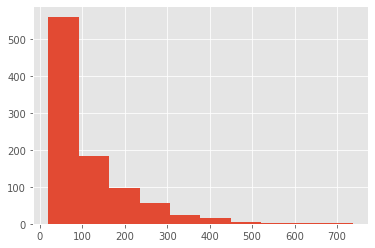

In [30]:
plt.style.use('ggplot')
tmp.sort_values( ascending=False ).hist()

In [31]:
# 사용자별 평가 회수, 평균 
user_state = datas.groupby('uid').agg({'rating':[np.size, np.mean]})
# agg : 여러 함수 쓰게 해줌

In [32]:
user_state.head(10)

rating          
      size      mean
uid                 
1      272  3.610294
2       62  3.709677
3       54  2.796296
4       24  4.333333
5      175  2.874286
6      211  3.635071
7      403  3.965261
8       59  3.796610
9       22  4.272727
10     184  4.206522

In [34]:
user_state.rating.describe()
# 최저, 최고 점수는 편중되어 있는 것으로 보임 

size        mean
count  943.000000  943.000000
mean   106.044539    3.588191
std    100.931743    0.445233
min     20.000000    1.491954
25%     33.000000    3.323054
50%     65.000000    3.620690
75%    148.000000    3.869565
max    737.000000    4.869565

# 데이터 모델링 
- libFM을 python으로 wrapping한 fastFM 제품 사용 
- fastFM은 리눅스(우분투 추천), 맥에서 설치 가능 